# Data Prep


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
inn=3
onn=2

In [ ]:
# creating clusters label
def clusters(df,x):
    df['Cluster']=x

In [ ]:
def make_clu(path,i):
    with pd.ExcelFile(path) as xl:
        out=pd.read_excel(xl,onn)
        #print(out.head())
        clusters(out,i)
        inl=pd.read_excel(xl,inn)
        clusters(inl,i)
        #print(inl.head())
        clu=out.append(inl)
        clu.drop(columns=['Unnamed: 0'],inplace=True)
        return clu

In [ ]:
c1=pd.DataFrame()
c2=pd.DataFrame()
c3=pd.DataFrame()
c4=pd.DataFrame()
c5=pd.DataFrame()

In [ ]:
c1=make_clu('/new_cluster_1.xlsx',1)
c2=make_clu('/new_cluster_2.xlsx',2)
c3=make_clu('/new_cluster_3.xlsx',3)
c4=make_clu('/new_cluster_4.xlsx',4)
c5=make_clu('/new_cluster_5.xlsx',5)

In [ ]:
c1.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-04-01,1,17.518176,93.58,18.72,53740.25,189,58806458,36.978,528,159.02985,8.29135,410.0,0,0,4,1138678,7,2142754,2,634000,210.0,97.0,472.250,16.42194,0.01,82.70,83.38,78.650,-4.73,3.62,-1.11,83.25,83.70,84.04,79.31,79.66,0,0,-2.510435,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,625.94,1251.97,201.94,940.81,423.61,1622.69,5066.96,1
1,2010-06-01,1,17.501328,93.49,18.72,56926.95,186,57973199,36.128,532,160.46554,8.13268,390.0,0,0,1,271208,3,909824,2,636890,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.310,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0,0,-2.355000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16,1
2,2012-03-01,1,16.310140,60.52,26.95,25176.14,123,38825958,21.637,589,179.43894,7.51981,457.5,0,0,2,526551,1,318376,0,0,0.0,97.5,731.875,17.73280,0.00,122.66,106.91,120.010,13.10,3.03,16.13,121.56,120.85,120.24,119.14,118.20,0,0,-10.649405,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.448276,1547.34,1077.82,1.57,430.30,252.10,917.36,4269.96,1
3,2012-04-01,1,17.291120,64.16,26.95,31668.42,122,38507582,21.485,588,179.23076,7.54634,460.0,0,0,1,269065,4,1282290,0,0,0.0,97.0,745.200,18.13957,0.01,122.88,102.93,120.405,17.48,2.40,19.87,122.08,121.36,120.65,119.83,118.80,0,0,-12.232364,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,1880.40,1822.11,257.62,518.51,765.84,1435.29,6679.78,1
4,2014-12-01,1,16.599973,68.51,24.23,74172.33,92,28234930,14.656,627,192.64842,8.30635,360.0,0,0,0,0,6,1908564,0,0,0.0,97.0,454.875,18.52333,0.01,70.15,65.99,68.910,2.92,1.11,4.03,70.58,71.14,71.70,69.32,70.03,0,0,1.010500,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,101.800000,1247.91,720.30,409.87,851.03,486.97,739.33,4557.21,1


In [ ]:
c2.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2016-08-01,1,6.201252,36.18,17.14,18644.36,113,34584599,16.635,676,207.89665,9.17443,210.0,0,0,0,0,1,319611,4,1198000,320.0,86.0,249.300,20.630,0.00,42.46,41.38,38.70,-2.68,3.79,1.11,43.53,43.98,44.57,39.47,39.94,0,0,-1.027000,...,NaN,77,9,NaN,2.0,NaN,1.0,2.0,32,1,1,2.0,NaN,NaN,NaN,89,NaN,6,NaN,15,NaN,1,NaN,1.0,NaN,NaN,5,NaN,NaN,NaN,29,90.967742,1534.47,549.42,1003.29,1645.75,314.70,373.51,5512.11,2
1,2016-09-01,1,5.837884,34.06,17.14,15463.55,116,35462988,17.032,677,208.21626,9.24409,222.5,0,0,0,0,6,1807789,7,2196768,605.4,86.0,242.875,20.719,0.01,47.04,44.86,44.81,-0.05,2.23,2.18,46.89,47.27,47.68,45.10,45.38,0,0,-2.406023,...,2.0,122,20,NaN,14.0,NaN,1.0,7.0,43,22,9,NaN,NaN,6.0,2.0,140,NaN,9,NaN,43,2.0,15,NaN,3.0,NaN,1.0,6,1.0,NaN,1.0,60,128.709677,1858.17,588.77,1185.72,2030.08,585.35,314.63,6691.44,2
2,2017-03-01,1,6.984117,52.79,13.23,19690.91,89,27350876,12.545,709,218.02794,9.21110,295.0,0,0,0,0,4,1216365,3,950993,243.0,81.0,325.875,19.180,0.01,55.59,54.00,54.95,0.95,0.61,1.56,56.51,56.84,57.01,54.71,54.80,0,0,-4.799500,...,1.0,257,17,NaN,8.0,NaN,3.0,1.0,60,14,9,1.0,NaN,NaN,NaN,254,NaN,12,NaN,30,NaN,9,1.0,6.0,NaN,8.0,25,NaN,NaN,NaN,73,510.930000,856.82,927.72,811.39,2008.45,552.52,1624.44,7292.28,2
3,2017-06-01,1,6.768468,51.16,13.23,18643.82,95,29323937,13.320,716,220.14256,9.36976,300.0,0,0,0,0,6,1835693,7,2182865,555.0,80.5,310.250,19.480,0.01,50.31,48.63,50.10,1.47,0.19,1.66,50.76,51.09,51.33,50.32,50.66,0,0,-3.747202,...,NaN,263,23,NaN,2.0,NaN,10.0,1.0,73,18,8,3.0,NaN,1.0,NaN,264,NaN,20,NaN,36,NaN,7,1.0,1.0,NaN,2.0,29,NaN,NaN,NaN,77,768.803871,2066.27,1388.59,942.66,2005.47,779.36,612.42,8563.59,2
4,2017-07-01,1,6.801543,51.41,13.23,18779.05,96,29671109,13.347,723,222.29813,9.37114,295.0,0,0,0,0,4,1209850,1,312105,81.0,81.0,297.500,19.420,0.01,47.92,46.33,46.44,0.11,1.46,1.57,48.77,49.04,49.33,46.83,47.01,0,0,-2.164095,...,NaN,310,22,NaN,5.0,NaN,2.0,2.0,93,11,7,2.0,NaN,NaN,NaN,301,NaN,13,1.0,52,1.0,12,NaN,3.0,NaN,NaN,32,NaN,NaN,NaN,95,508.870000,2775.06,823.11,844.66,2245.32,467.08,393.53,8057.63,2


In [ ]:
def join_clu():
    return c1.append(c2.append(c3.append(c4.append(c5))))

In [ ]:
vlcc=join_clu()

In [ ]:
vlcc.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-04-01,1,17.518176,93.58,18.72,53740.25,189,58806458.0,36.978,528,159.02985,8.29135,410.0,0.0,0.0,4,1138678.0,7,2142754.0,2,634000.0,210.0,97.0,472.250,16.42194,0.01,82.70,83.38,78.650,-4.73,3.62,-1.11,83.25,83.70,84.04,79.31,79.66,0.0,0.0,-2.510435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,625.94,1251.97,201.94,940.81,423.61,1622.69,5066.96,1
1,2010-06-01,1,17.501328,93.49,18.72,56926.95,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.310,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16,1
2,2012-03-01,1,16.310140,60.52,26.95,25176.14,123,38825958.0,21.637,589,179.43894,7.51981,457.5,0.0,0.0,2,526551.0,1,318376.0,0,0.0,0.0,97.5,731.875,17.73280,0.00,122.66,106.91,120.010,13.10,3.03,16.13,121.56,120.85,120.24,119.14,118.20,0.0,0.0,-10.649405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.448276,1547.34,1077.82,1.57,430.30,252.10,917.36,4269.96,1
3,2012-04-01,1,17.291120,64.16,26.95,31668.42,122,38507582.0,21.485,588,179.23076,7.54634,460.0,0.0,0.0,1,269065.0,4,1282290.0,0,0.0,0.0,97.0,745.200,18.13957,0.01,122.88,102.93,120.405,17.48,2.40,19.87,122.08,121.36,120.65,119.83,118.80,0.0,0.0,-12.232364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1880.40,1822.11,257.62,518.51,765.84,1435.29,6679.78,1
4,2014-12-01,1,16.599973,68.51,24.23,74172.33,92,28234930.0,14.656,627,192.64842,8.30635,360.0,0.0,0.0,0,0.0,6,1908564.0,0,0.0,0.0,97.0,454.875,18.52333,0.01,70.15,65.99,68.910,2.92,1.11,4.03,70.58,71.14,71.70,69.32,70.03,0.0,0.0,1.010500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.800000,1247.91,720.30,409.87,851.03,486.97,739.33,4557.21,1


In [ ]:
len(vlcc)

131

In [ ]:
vlcc['Exceptions'].value_counts().to_frame()

,Exceptions
0,98
1,33


# K neighboors Classfier

In [ ]:
vin=vlcc[vlcc['Exceptions']==1]
vout=vlcc[vlcc['Exceptions']==0]
vout.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-02-01,0,14.790672,79.01,18.72,39970.65,198,61549482.0,38.340,535,160.53493,8.62632,375.0,0.0,0.0,1,236000.0,7,2125853.0,2,634493.0,228.0,99.00,481.80,16.04903,0.01,71.46,72.64,71.29,-1.35,-0.11,-1.46,72.08,72.76,73.44,72.11,72.39,0.0,0.0,-1.695000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.85,696.20,3.49,359.06,514.52,1392.98,3160.09,1
1,2010-03-01,0,15.475824,82.67,18.72,43224.09,193,60058122.0,37.600,531,159.72758,8.39532,400.0,0.0,0.0,2,525317.0,4,1251664.0,0,0.0,0.0,97.00,465.25,16.69661,0.00,77.59,79.61,74.13,-5.48,3.52,-1.96,77.97,78.49,79.00,74.74,75.29,0.0,0.0,-1.271389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.57,1668.20,1.63,179.54,99.43,1638.24,3724.62,1
2,2010-05-01,0,13.955760,74.55,18.72,35195.68,184,57297704.0,35.803,531,160.03393,8.19099,460.0,0.0,0.0,1,245654.0,4,1234710.0,6,1910205.0,646.0,99.75,481.20,16.48315,0.01,87.44,86.22,85.77,-0.45,1.70,1.25,88.45,89.29,89.97,85.99,86.33,0.0,0.0,-2.913905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.5,1091.23,1369.29,316.63,833.33,213.33,1014.59,4931.92,1
3,2010-07-01,0,10.837008,57.89,18.72,19528.68,185,57700265.0,35.880,533,160.81272,8.13430,380.0,0.0,0.0,0,0.0,5,1530400.0,7,2184946.0,680.0,104.00,443.25,15.88385,0.01,75.01,75.37,73.21,-2.16,1.52,-0.64,75.28,75.70,76.17,73.57,74.07,0.0,0.0,-2.649091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327.53,824.38,244.00,976.48,0.00,967.05,4339.44,1
4,2010-08-01,0,9.642672,51.51,18.72,12233.05,187,58354811.0,36.132,535,161.50403,8.08333,380.0,0.0,0.0,1,285715.0,7,2186403.0,6,1898997.0,620.0,106.00,442.20,16.19335,0.01,78.18,78.99,73.75,-5.24,4.51,-0.73,78.48,79.05,79.66,74.44,75.06,0.0,0.0,-2.198909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,635.60,216.86,63.35,886.46,0.00,467.04,2269.31,1


In [ ]:
vin.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-04-01,1,17.518176,93.58,18.72,53740.25,189,58806458.0,36.978,528,159.02985,8.29135,410.0,0.0,0.0,4,1138678.0,7,2142754.0,2,634000.0,210.0,97.0,472.250,16.42194,0.01,82.70,83.38,78.650,-4.73,3.62,-1.11,83.25,83.70,84.04,79.31,79.66,0.0,0.0,-2.510435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,625.94,1251.97,201.94,940.81,423.61,1622.69,5066.96,1
1,2010-06-01,1,17.501328,93.49,18.72,56926.95,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.310,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16,1
2,2012-03-01,1,16.310140,60.52,26.95,25176.14,123,38825958.0,21.637,589,179.43894,7.51981,457.5,0.0,0.0,2,526551.0,1,318376.0,0,0.0,0.0,97.5,731.875,17.73280,0.00,122.66,106.91,120.010,13.10,3.03,16.13,121.56,120.85,120.24,119.14,118.20,0.0,0.0,-10.649405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.448276,1547.34,1077.82,1.57,430.30,252.10,917.36,4269.96,1
3,2012-04-01,1,17.291120,64.16,26.95,31668.42,122,38507582.0,21.485,588,179.23076,7.54634,460.0,0.0,0.0,1,269065.0,4,1282290.0,0,0.0,0.0,97.0,745.200,18.13957,0.01,122.88,102.93,120.405,17.48,2.40,19.87,122.08,121.36,120.65,119.83,118.80,0.0,0.0,-12.232364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1880.40,1822.11,257.62,518.51,765.84,1435.29,6679.78,1
4,2014-12-01,1,16.599973,68.51,24.23,74172.33,92,28234930.0,14.656,627,192.64842,8.30635,360.0,0.0,0.0,0,0.0,6,1908564.0,0,0.0,0.0,97.0,454.875,18.52333,0.01,70.15,65.99,68.910,2.92,1.11,4.03,70.58,71.14,71.70,69.32,70.03,0.0,0.0,1.010500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.800000,1247.91,720.30,409.87,851.03,486.97,739.33,4557.21,1


In [ ]:
intrain,intest=train_test_split(vin,test_size=0.33)

In [ ]:
outtrain,outtest=train_test_split(vout,test_size=0.33)

In [ ]:
vtrain=shuffle(outtrain.append(intrain))
vtest=shuffle(outtest.append(intest))

In [ ]:
vtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 9 to 4
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 70.0 KB


In [ ]:
vtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 11
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 35.4 KB


In [ ]:
ytrain=vtrain['Exceptions']
ytest=vtest['Exceptions']

In [ ]:
xtrain=vtrain.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])
xtest=vtest.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])

In [ ]:
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
9,107,32941171.0,14.193,753,232.10041,9.41169,272.5,0.0,0.0,0,0.0,3,953797.0,2,621000.0,186.00,93.0,406.00,19.57740,0.00,66.03,57.25,66.00,8.75,0.02,8.77,66.31,66.33,66.23,65.74,65.56,33.0,10128073.0,-8.094444,3.0,26000.0,239,17612.0,4093.0,12338.0,...,NaN,1.0,289.0,10.0,NaN,2.0,NaN,1.0,6.0,50.0,15.0,12.0,2.0,NaN,NaN,NaN,258.0,NaN,20.0,1.0,52.0,NaN,6.0,NaN,3.0,NaN,1.0,15.0,1.0,NaN,NaN,64.0,442.282857,825.45,700.97,772.16,2529.45,460.20,1936.03,7666.55
4,105,32636089.0,14.472,733,225.51090,9.40621,342.5,0.0,0.0,9,2667095.0,2,627826.0,14,4297228.0,1206.80,86.0,373.10,19.19000,-0.01,70.27,64.91,65.40,0.49,4.82,5.31,69.34,68.85,68.36,65.90,65.75,26.0,8186073.0,-7.583333,2.0,20500.0,230,18428.0,4383.0,11781.0,...,NaN,NaN,140.0,6.0,NaN,NaN,NaN,1.0,NaN,33.0,5.0,4.0,NaN,NaN,NaN,NaN,125.0,NaN,6.0,2.0,23.0,NaN,1.0,NaN,1.0,NaN,3.0,6.0,NaN,NaN,NaN,33.0,411.746774,2080.77,1318.14,881.60,2781.96,675.88,1238.49,9388.58
31,78,24670913.0,13.141,614,187.73463,7.60708,397.5,0.0,0.0,0,0.0,2,635473.0,3,926520.0,255.86,93.0,605.00,17.29720,0.00,111.11,91.79,107.75,15.96,3.52,19.48,109.89,109.06,108.47,105.94,105.44,0.0,0.0,-8.259000,2.0,21250.0,152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.574194,1160.85,542.41,208.23,832.90,238.71,877.06,3967.72
28,91,28771984.0,15.620,603,184.20026,7.59259,377.5,0.0,0.0,0,0.0,6,1879766.0,0,0.0,0.00,95.0,665.25,17.97490,0.01,112.39,92.10,110.61,18.51,1.61,20.12,111.58,110.93,110.31,109.55,108.97,0.0,0.0,-9.693000,6.0,22000.0,153,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.000000,2010.80,779.23,748.62,654.86,0.00,1349.25,5747.75
19,145,45671897.0,26.118,575,174.86481,7.62000,457.5,0.0,0.0,0,0.0,4,1258567.0,0,0.0,0.00,100.0,659.75,17.08642,0.01,109.56,92.58,105.92,13.34,3.27,16.61,108.84,108.33,107.80,104.95,104.22,0.0,0.0,-9.364000,4.0,19750.0,192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.387097,3079.06,987.28,132.12,559.49,85.81,1479.96,6336.09


In [ ]:
#replace numpy
xtrain=xtrain.fillna(method='pad').fillna(method='bfill')
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
9,107,32941171.0,14.193,753,232.10041,9.41169,272.5,0.0,0.0,0,0.0,3,953797.0,2,621000.0,186.00,93.0,406.00,19.57740,0.00,66.03,57.25,66.00,8.75,0.02,8.77,66.31,66.33,66.23,65.74,65.56,33.0,10128073.0,-8.094444,3.0,26000.0,239,17612.0,4093.0,12338.0,...,0.0,1.0,289.0,10.0,0.0,2.0,0.0,1.0,6.0,50.0,15.0,12.0,2.0,0.0,0.0,0.0,258.0,0.0,20.0,1.0,52.0,0.0,6.0,0.0,3.0,0.0,1.0,15.0,1.0,0.0,0.0,64.0,442.282857,825.45,700.97,772.16,2529.45,460.20,1936.03,7666.55
4,105,32636089.0,14.472,733,225.51090,9.40621,342.5,0.0,0.0,9,2667095.0,2,627826.0,14,4297228.0,1206.80,86.0,373.10,19.19000,-0.01,70.27,64.91,65.40,0.49,4.82,5.31,69.34,68.85,68.36,65.90,65.75,26.0,8186073.0,-7.583333,2.0,20500.0,230,18428.0,4383.0,11781.0,...,0.0,1.0,140.0,6.0,0.0,2.0,0.0,1.0,6.0,33.0,5.0,4.0,2.0,0.0,0.0,0.0,125.0,0.0,6.0,2.0,23.0,0.0,1.0,0.0,1.0,0.0,3.0,6.0,1.0,0.0,0.0,33.0,411.746774,2080.77,1318.14,881.60,2781.96,675.88,1238.49,9388.58
31,78,24670913.0,13.141,614,187.73463,7.60708,397.5,0.0,0.0,0,0.0,2,635473.0,3,926520.0,255.86,93.0,605.00,17.29720,0.00,111.11,91.79,107.75,15.96,3.52,19.48,109.89,109.06,108.47,105.94,105.44,0.0,0.0,-8.259000,2.0,21250.0,152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.574194,1160.85,542.41,208.23,832.90,238.71,877.06,3967.72
28,91,28771984.0,15.620,603,184.20026,7.59259,377.5,0.0,0.0,0,0.0,6,1879766.0,0,0.0,0.00,95.0,665.25,17.97490,0.01,112.39,92.10,110.61,18.51,1.61,20.12,111.58,110.93,110.31,109.55,108.97,0.0,0.0,-9.693000,6.0,22000.0,153,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.000000,2010.80,779.23,748.62,654.86,0.00,1349.25,5747.75
19,145,45671897.0,26.118,575,174.86481,7.62000,457.5,0.0,0.0,0,0.0,4,1258567.0,0,0.0,0.00,100.0,659.75,17.08642,0.01,109.56,92.58,105.92,13.34,3.27,16.61,108.84,108.33,107.80,104.95,104.22,0.0,0.0,-9.364000,4.0,19750.0,192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.387097,3079.06,987.28,132.12,559.49,85.81,1479.96,6336.09


In [ ]:
xtest=xtest.fillna(method='pad').fillna(method='bfill')
xtest.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
1,75,22977006.0,9.404,792,244.33874,9.49916,272.5,0.0,0.0,0,0.0,6,1842443.0,1,300000.0,94.20,92.0,326.8125,19.47678,0.01,60.23,54.14,61.05,6.91,-0.84,6.07,59.62,58.91,58.34,59.55,58.24,63.0,19546365.0,-15.807500,6.0,51375.0,278,17400.0,3899.0,12341.0,...,0.0,1.0,561.0,10.0,2.0,0.0,0.0,19.0,6.0,86.0,24.0,12.0,0.0,3.0,0.0,0.0,509.0,0.0,50.0,5.0,88.0,0.0,3.0,0.0,0.0,0.0,3.0,17.0,1.0,0.0,0.0,131.0,794.921936,2371.370000,1133.210000,1352.110000,3072.480000,1022.690000,2093.140000,11839.940000
16,162,50943075.0,29.637,566,171.89081,7.71746,505.0,0.0,0.0,0,0.0,4,1216931.0,0,0.0,0.00,102.0,674.5000,17.43164,0.01,116.74,95.86,111.05,15.19,5.80,20.99,116.53,116.54,116.53,111.36,111.55,0.0,0.0,-3.297333,4.0,25800.0,168,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.419355,2010.330000,306.290000,127.210000,185.210000,24.190000,628.490000,3359.140000
3,64,50943075.0,29.637,828,171.89081,9.90962,505.0,0.0,0.0,0,0.0,3,1216931.0,2,0.0,0.00,85.0,266.3500,17.43164,0.01,37.46,35.79,37.15,1.36,0.31,1.67,37.94,38.40,116.53,37.58,37.83,0.0,0.0,-3.297333,4.0,25900.0,150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,806.425807,3559.599677,2112.392081,1204.387419,3059.404677,950.522258,5016.175484,16708.914145
37,64,20268324.0,10.556,627,191.99960,7.72754,365.0,0.0,0.0,1,281050.0,3,953797.0,0,0.0,0.00,89.5,614.5000,17.75093,0.00,102.16,96.49,100.40,3.91,1.59,5.50,101.72,101.26,100.85,99.98,99.52,0.0,0.0,-7.245000,3.0,18000.0,151,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.300000,2379.480000,436.100000,308.980000,300.420000,235.390000,659.820000,4389.490000
5,93,28773364.0,12.874,727,223.50798,9.40245,300.0,0.0,0.0,2,605601.0,6,1827239.0,4,1274432.0,326.28,81.0,303.3750,19.33000,0.01,52.65,50.17,50.35,0.18,2.27,2.45,52.72,52.87,53.02,50.66,50.85,0.0,0.0,-2.395714,6.0,26500.0,173,19144.0,4714.0,13026.0,...,0.0,0.0,213.0,11.0,0.0,3.0,0.0,5.0,2.0,65.0,8.0,5.0,0.0,0.0,0.0,0.0,229.0,0.0,10.0,0.0,28.0,1.0,6.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,57.0,418.370968,2278.390000,400.450000,926.740000,2492.980000,429.890000,200.610000,7147.410000


In [ ]:
ytrain.head()

9     0
4     1
31    0
28    0
19    0
Name: Exceptions, dtype: int64

In [ ]:
knn=KNeighborsClassifier(n_neighbors=1,weights='distance')

In [ ]:
knn.fit(xtrain.to_numpy(),ytrain.to_numpy())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [ ]:
knn.score(xtest.to_numpy(),ytest.to_numpy())

0.7272727272727273

In [ ]:
knn.predict(xtest.to_numpy())

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
f1_score(knn.predict(xtest.to_numpy()),ytest.to_numpy())

0.25000000000000006

In [ ]:
precision_score(knn.predict(xtest.to_numpy()),ytest.to_numpy())

0.18181818181818182

In [ ]:
recall_score(knn.predict(xtest.to_numpy()),ytest.to_numpy())

0.4

# Decision Tree

In [ ]:
vin=vlcc[vlcc['Exceptions']==1]
vout=vlcc[vlcc['Exceptions']==0]
vout.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-02-01,0,14.790672,79.01,18.72,39970.65,198,61549482.0,38.340,535,160.53493,8.62632,375.0,0.0,0.0,1,236000.0,7,2125853.0,2,634493.0,228.0,99.00,481.80,16.04903,0.01,71.46,72.64,71.29,-1.35,-0.11,-1.46,72.08,72.76,73.44,72.11,72.39,0.0,0.0,-1.695000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.85,696.20,3.49,359.06,514.52,1392.98,3160.09,1
1,2010-03-01,0,15.475824,82.67,18.72,43224.09,193,60058122.0,37.600,531,159.72758,8.39532,400.0,0.0,0.0,2,525317.0,4,1251664.0,0,0.0,0.0,97.00,465.25,16.69661,0.00,77.59,79.61,74.13,-5.48,3.52,-1.96,77.97,78.49,79.00,74.74,75.29,0.0,0.0,-1.271389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.57,1668.20,1.63,179.54,99.43,1638.24,3724.62,1
2,2010-05-01,0,13.955760,74.55,18.72,35195.68,184,57297704.0,35.803,531,160.03393,8.19099,460.0,0.0,0.0,1,245654.0,4,1234710.0,6,1910205.0,646.0,99.75,481.20,16.48315,0.01,87.44,86.22,85.77,-0.45,1.70,1.25,88.45,89.29,89.97,85.99,86.33,0.0,0.0,-2.913905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.5,1091.23,1369.29,316.63,833.33,213.33,1014.59,4931.92,1
3,2010-07-01,0,10.837008,57.89,18.72,19528.68,185,57700265.0,35.880,533,160.81272,8.13430,380.0,0.0,0.0,0,0.0,5,1530400.0,7,2184946.0,680.0,104.00,443.25,15.88385,0.01,75.01,75.37,73.21,-2.16,1.52,-0.64,75.28,75.70,76.17,73.57,74.07,0.0,0.0,-2.649091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327.53,824.38,244.00,976.48,0.00,967.05,4339.44,1
4,2010-08-01,0,9.642672,51.51,18.72,12233.05,187,58354811.0,36.132,535,161.50403,8.08333,380.0,0.0,0.0,1,285715.0,7,2186403.0,6,1898997.0,620.0,106.00,442.20,16.19335,0.01,78.18,78.99,73.75,-5.24,4.51,-0.73,78.48,79.05,79.66,74.44,75.06,0.0,0.0,-2.198909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,635.60,216.86,63.35,886.46,0.00,467.04,2269.31,1


In [ ]:
vin.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-04-01,1,17.518176,93.58,18.72,53740.25,189,58806458.0,36.978,528,159.02985,8.29135,410.0,0.0,0.0,4,1138678.0,7,2142754.0,2,634000.0,210.0,97.0,472.250,16.42194,0.01,82.70,83.38,78.650,-4.73,3.62,-1.11,83.25,83.70,84.04,79.31,79.66,0.0,0.0,-2.510435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,625.94,1251.97,201.94,940.81,423.61,1622.69,5066.96,1
1,2010-06-01,1,17.501328,93.49,18.72,56926.95,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.310,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16,1
2,2012-03-01,1,16.310140,60.52,26.95,25176.14,123,38825958.0,21.637,589,179.43894,7.51981,457.5,0.0,0.0,2,526551.0,1,318376.0,0,0.0,0.0,97.5,731.875,17.73280,0.00,122.66,106.91,120.010,13.10,3.03,16.13,121.56,120.85,120.24,119.14,118.20,0.0,0.0,-10.649405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.448276,1547.34,1077.82,1.57,430.30,252.10,917.36,4269.96,1
3,2012-04-01,1,17.291120,64.16,26.95,31668.42,122,38507582.0,21.485,588,179.23076,7.54634,460.0,0.0,0.0,1,269065.0,4,1282290.0,0,0.0,0.0,97.0,745.200,18.13957,0.01,122.88,102.93,120.405,17.48,2.40,19.87,122.08,121.36,120.65,119.83,118.80,0.0,0.0,-12.232364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1880.40,1822.11,257.62,518.51,765.84,1435.29,6679.78,1
4,2014-12-01,1,16.599973,68.51,24.23,74172.33,92,28234930.0,14.656,627,192.64842,8.30635,360.0,0.0,0.0,0,0.0,6,1908564.0,0,0.0,0.0,97.0,454.875,18.52333,0.01,70.15,65.99,68.910,2.92,1.11,4.03,70.58,71.14,71.70,69.32,70.03,0.0,0.0,1.010500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.800000,1247.91,720.30,409.87,851.03,486.97,739.33,4557.21,1


In [ ]:
intrain,intest=train_test_split(vin,test_size=0.33)

In [ ]:
outtrain,outtest=train_test_split(vout,test_size=0.33)

In [ ]:
vtrain=shuffle(outtrain.append(intrain))
vtest=shuffle(outtest.append(intest))

In [ ]:
vtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 41 to 2
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 70.0 KB


In [ ]:
vtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 10 to 3
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 35.4 KB


In [ ]:
ytrain=vtrain['Exceptions']
ytest=vtest['Exceptions']

In [ ]:
xtrain=vtrain.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])
xtest=vtest.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])

In [ ]:
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
41,61,19296926.0,10.057,626,191.87752,7.80724,400.0,0.0,0.0,2,563808.0,1,320122.0,0,0.0,0.0,90.5,616.7500,17.91645,0.00,108.84,96.24,107.91,11.67,0.99,12.66,108.63,108.17,107.67,106.51,105.13,0.0,0.0,-9.775455,1.0,18000.0,228,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.645161,2531.32,1921.86,1048.03,739.65,365.16,1461.31,8189.97
1,120,37118279.0,16.513,730,224.77728,9.28322,340.0,0.0,0.0,5,1503849.0,2,630716.0,2,620000.0,178.8,88.5,449.9000,19.56000,0.00,79.44,74.25,75.85,1.60,3.57,5.17,79.23,78.86,78.53,75.11,74.72,27.0,8485168.0,-8.124500,2.0,19225.0,223,19358.0,4434.0,12337.0,...,NaN,NaN,119.0,4.0,NaN,1.0,NaN,1.0,NaN,31.0,5.0,4.0,NaN,NaN,NaN,NaN,119.0,NaN,7.0,NaN,22.0,1.0,NaN,NaN,NaN,NaN,1.0,9.0,NaN,NaN,1.0,26.0,437.600000,2169.78,773.90,679.53,2477.65,300.81,339.04,7178.29
25,107,33791361.0,18.608,595,181.59759,7.53473,370.0,0.0,0.0,0,0.0,5,1547785.0,0,0.0,0.0,96.0,604.4000,18.30954,0.01,97.80,84.87,92.91,8.04,4.66,12.70,97.88,97.75,97.79,91.16,90.69,0.0,0.0,-6.313333,5.0,26000.0,127,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,2727.25,1209.72,331.73,381.59,16.71,655.16,5397.17
45,84,26016769.0,13.613,623,191.12189,7.94195,390.0,0.0,0.0,2,576362.0,2,628990.0,7,2096565.0,684.9,98.5,605.5000,17.50849,0.00,109.07,102.76,105.41,2.65,3.74,6.39,108.63,108.31,107.96,105.66,105.40,0.0,0.0,-9.251500,2.0,25875.0,150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.427143,632.71,465.95,193.63,659.17,455.47,1432.99,3887.32
1,75,22977006.0,9.404,792,244.33874,9.49916,272.5,0.0,0.0,0,0.0,6,1842443.0,1,300000.0,94.2,92.0,326.8125,19.47678,0.01,60.23,54.14,61.05,6.91,-0.84,6.07,59.62,58.91,58.34,59.55,58.24,63.0,19546365.0,-15.807500,6.0,51375.0,278,17400.0,3899.0,12341.0,...,NaN,1.0,561.0,10.0,2.0,NaN,NaN,19.0,6.0,86.0,24.0,12.0,NaN,3.0,NaN,NaN,509.0,NaN,50.0,5.0,88.0,NaN,3.0,NaN,NaN,NaN,3.0,17.0,1.0,NaN,NaN,131.0,794.921936,2371.37,1133.21,1352.11,3072.48,1022.69,2093.14,11839.94


In [ ]:
vtrain['Exceptions'].value_counts().to_frame()

,Exceptions
0,65
1,22


In [ ]:
#replace numpy
xtrain=xtrain.fillna(-1)
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
41,61,19296926.0,10.057,626,191.87752,7.80724,400.0,0.0,0.0,2,563808.0,1,320122.0,0,0.0,0.0,90.5,616.7500,17.91645,0.00,108.84,96.24,107.91,11.67,0.99,12.66,108.63,108.17,107.67,106.51,105.13,0.0,0.0,-9.775455,1.0,18000.0,228,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.645161,2531.32,1921.86,1048.03,739.65,365.16,1461.31,8189.97
1,120,37118279.0,16.513,730,224.77728,9.28322,340.0,0.0,0.0,5,1503849.0,2,630716.0,2,620000.0,178.8,88.5,449.9000,19.56000,0.00,79.44,74.25,75.85,1.60,3.57,5.17,79.23,78.86,78.53,75.11,74.72,27.0,8485168.0,-8.124500,2.0,19225.0,223,19358.0,4434.0,12337.0,...,-1.0,-1.0,119.0,4.0,-1.0,1.0,-1.0,1.0,-1.0,31.0,5.0,4.0,-1.0,-1.0,-1.0,-1.0,119.0,-1.0,7.0,-1.0,22.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,9.0,-1.0,-1.0,1.0,26.0,437.600000,2169.78,773.90,679.53,2477.65,300.81,339.04,7178.29
25,107,33791361.0,18.608,595,181.59759,7.53473,370.0,0.0,0.0,0,0.0,5,1547785.0,0,0.0,0.0,96.0,604.4000,18.30954,0.01,97.80,84.87,92.91,8.04,4.66,12.70,97.88,97.75,97.79,91.16,90.69,0.0,0.0,-6.313333,5.0,26000.0,127,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.000000,2727.25,1209.72,331.73,381.59,16.71,655.16,5397.17
45,84,26016769.0,13.613,623,191.12189,7.94195,390.0,0.0,0.0,2,576362.0,2,628990.0,7,2096565.0,684.9,98.5,605.5000,17.50849,0.00,109.07,102.76,105.41,2.65,3.74,6.39,108.63,108.31,107.96,105.66,105.40,0.0,0.0,-9.251500,2.0,25875.0,150,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,47.427143,632.71,465.95,193.63,659.17,455.47,1432.99,3887.32
1,75,22977006.0,9.404,792,244.33874,9.49916,272.5,0.0,0.0,0,0.0,6,1842443.0,1,300000.0,94.2,92.0,326.8125,19.47678,0.01,60.23,54.14,61.05,6.91,-0.84,6.07,59.62,58.91,58.34,59.55,58.24,63.0,19546365.0,-15.807500,6.0,51375.0,278,17400.0,3899.0,12341.0,...,-1.0,1.0,561.0,10.0,2.0,-1.0,-1.0,19.0,6.0,86.0,24.0,12.0,-1.0,3.0,-1.0,-1.0,509.0,-1.0,50.0,5.0,88.0,-1.0,3.0,-1.0,-1.0,-1.0,3.0,17.0,1.0,-1.0,-1.0,131.0,794.921936,2371.37,1133.21,1352.11,3072.48,1022.69,2093.14,11839.94


In [ ]:
xtest=xtest.fillna(-1)
xtest.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
10,106,32608374.0,13.992,756,233.05421,9.45734,272.5,0.0,0.0,0,0.0,5,1559012.0,0,0.0,0.00,93.0,431.200,19.34116,0.01,68.39,60.18,67.20,7.02,1.19,8.21,67.58,67.21,66.94,66.91,66.49,32.0,9828083.0,-9.184952,5.0,29800.0,219,17751.0,4019.0,12147.0,...,-1.0,-1.0,225.0,7.0,-1.0,6.0,-1.0,2.0,2.0,46.0,8.0,13.0,-1.0,-1.0,-1.0,-1.0,203.0,-1.0,15.0,2.0,38.0,1.0,4.0,-1.0,-1.0,-1.0,2.0,16.0,-1.0,1.0,-1.0,51.0,346.551290,2028.05000,1610.140000,1083.13,2936.020000,667.410000,1615.840000,10287.120000
31,78,24670913.0,13.141,614,187.73463,7.60708,397.5,0.0,0.0,0,0.0,2,635473.0,3,926520.0,255.86,93.0,605.000,17.29720,0.00,111.11,91.79,107.75,15.96,3.52,19.48,109.89,109.06,108.47,105.94,105.44,0.0,0.0,-8.259000,2.0,21250.0,152,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.574194,1160.85000,542.410000,208.23,832.900000,238.710000,877.060000,3967.720000
2,70,21434563.0,8.728,796,245.57739,9.49267,272.5,0.0,0.0,0,0.0,6,1825915.0,0,0.0,0.00,92.0,279.450,19.99063,0.01,62.43,55.42,63.85,8.43,0.07,8.50,60.49,59.85,59.35,62.63,61.29,66.0,20443712.0,-16.154714,6.0,47050.0,216,18235.0,4084.0,12241.0,...,-1.0,2.0,427.0,9.0,-1.0,6.0,-1.0,3.0,5.0,104.0,26.0,8.0,2.0,1.0,2.0,1.0,364.0,-1.0,39.0,3.0,92.0,-1.0,10.0,-1.0,1.0,-1.0,3.0,20.0,1.0,2.0,2.0,128.0,532.173333,1726.63000,982.100000,878.57,2856.860000,1132.570000,1371.830000,9480.730000
16,71,21743130.0,8.767,804,248.00483,9.56385,272.5,0.0,0.0,0,0.0,10,3031092.0,1,300000.0,94.20,92.0,307.750,18.48406,0.01,58.16,51.63,58.46,6.83,-0.27,6.56,56.62,56.42,56.24,56.92,56.54,65.0,20092977.0,-17.076048,10.0,48650.0,265,18034.0,4133.0,12232.0,...,-1.0,-1.0,592.0,2.0,-1.0,1.0,-1.0,4.0,8.0,161.0,8.0,8.0,1.0,1.0,-1.0,-1.0,503.0,-1.0,54.0,6.0,116.0,-1.0,2.0,-1.0,3.0,-1.0,9.0,40.0,-1.0,1.0,1.0,129.0,365.214516,1203.17129,806.146774,370.47,2999.890645,417.788065,654.534839,6817.220903
5,114,35218630.0,15.592,733,225.87558,9.35982,292.5,0.0,0.0,1,301428.0,6,1866421.0,2,620000.0,178.80,92.5,511.625,19.24000,0.01,75.47,64.86,75.67,10.81,-0.21,10.60,75.04,75.06,75.09,75.48,75.21,31.0,9665532.0,-7.985978,6.0,26125.0,322,18025.0,4161.0,12141.0,...,-1.0,-1.0,327.0,10.0,-1.0,5.0,-1.0,2.0,5.0,62.0,10.0,17.0,-1.0,-1.0,-1.0,-1.0,331.0,1.0,22.0,1.0,41.0,1.0,5.0,-1.0,-1.0,-1.0,2.0,16.0,-1.0,-1.0,-1.0,72.0,487.580645,1943.43000,1029.920000,1235.81,2963.730000,442.960000,2084.300000,10187.720000


In [ ]:
ytrain.head()

41    0
1     0
25    0
45    0
1     1
Name: Exceptions, dtype: int64

In [ ]:
dt=DecisionTreeClassifier(max_depth=2)

In [ ]:
dt.fit(xtrain.to_numpy(),ytrain.to_numpy())

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(697.5, 906.0, 'Fujairah Bunker Prices <= 416.625\ngini = 0.378\nsamples = 87\nvalue = [65, 22]\nclass = 0'),
 Text(348.75, 543.6, 'AG Crude Exports <= 19.493\ngini = 0.5\nsamples = 37\nvalue = [18, 19]\nclass = 1'),
 Text(174.375, 181.19999999999993, 'gini = 0.459\nsamples = 28\nvalue = [10, 18]\nclass = 1'),
 Text(523.125, 181.19999999999993, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]\nclass = 0'),
 Text(1046.25, 543.6, 'PCAAU00.Dubai_02 <= 119.27\ngini = 0.113\nsamples = 50\nvalue = [47, 3]\nclass = 0'),
 Text(871.875, 181.19999999999993, 'gini = 0.078\nsamples = 49\nvalue = [47, 2]\nclass = 0'),
 Text(1220.625, 181.19999999999993, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1')]

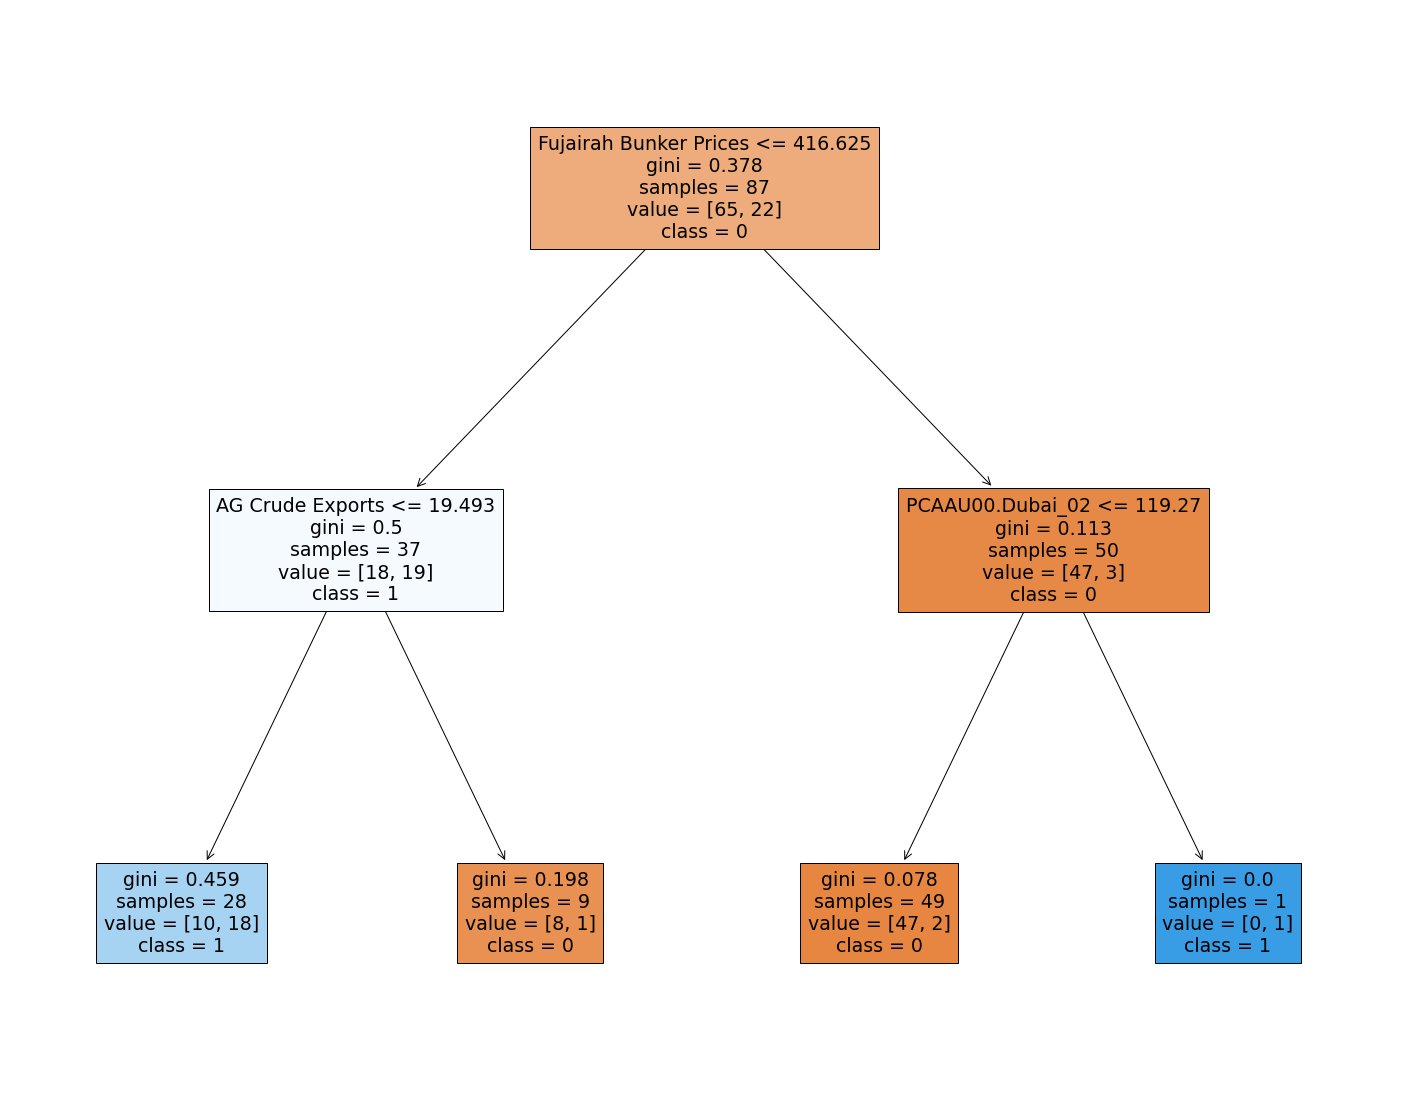

In [ ]:
fig = plt.figure(figsize=(25,20))
plot_tree(dt, 
                   feature_names=xtest.columns.to_list(),  
                   class_names=['0','1'],
                   filled=True)

In [ ]:
dt.score(xtest.to_numpy(),ytest.to_numpy())

0.7272727272727273

In [ ]:
f1_score(dt.predict(xtest.to_numpy()),ytest.to_numpy())

0.5384615384615385

In [ ]:
precision_score(dt.predict(xtest.to_numpy()),ytest.to_numpy())

0.6363636363636364

In [ ]:
recall_score(dt.predict(xtest.to_numpy()),ytest.to_numpy())

0.4666666666666667

In [ ]:
vlcc['TS.Middle East'].mean()

471.1345318419845

In [ ]:
vlcc['TF.Des_ARA Region'].mean()

2.824

In [ ]:
vlcc['Diff_Brent_Dub'].mean()

2.59587786259542

# Logistic Regression

In [ ]:
vin=vlcc[vlcc['Exceptions']==1]
vout=vlcc[vlcc['Exceptions']==0]
vout.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-02-01,0,14.790672,79.01,18.72,39970.65,198,61549482.0,38.340,535,160.53493,8.62632,375.0,0.0,0.0,1,236000.0,7,2125853.0,2,634493.0,228.0,99.00,481.80,16.04903,0.01,71.46,72.64,71.29,-1.35,-0.11,-1.46,72.08,72.76,73.44,72.11,72.39,0.0,0.0,-1.695000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.85,696.20,3.49,359.06,514.52,1392.98,3160.09,1
1,2010-03-01,0,15.475824,82.67,18.72,43224.09,193,60058122.0,37.600,531,159.72758,8.39532,400.0,0.0,0.0,2,525317.0,4,1251664.0,0,0.0,0.0,97.00,465.25,16.69661,0.00,77.59,79.61,74.13,-5.48,3.52,-1.96,77.97,78.49,79.00,74.74,75.29,0.0,0.0,-1.271389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.57,1668.20,1.63,179.54,99.43,1638.24,3724.62,1
2,2010-05-01,0,13.955760,74.55,18.72,35195.68,184,57297704.0,35.803,531,160.03393,8.19099,460.0,0.0,0.0,1,245654.0,4,1234710.0,6,1910205.0,646.0,99.75,481.20,16.48315,0.01,87.44,86.22,85.77,-0.45,1.70,1.25,88.45,89.29,89.97,85.99,86.33,0.0,0.0,-2.913905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.5,1091.23,1369.29,316.63,833.33,213.33,1014.59,4931.92,1
3,2010-07-01,0,10.837008,57.89,18.72,19528.68,185,57700265.0,35.880,533,160.81272,8.13430,380.0,0.0,0.0,0,0.0,5,1530400.0,7,2184946.0,680.0,104.00,443.25,15.88385,0.01,75.01,75.37,73.21,-2.16,1.52,-0.64,75.28,75.70,76.17,73.57,74.07,0.0,0.0,-2.649091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327.53,824.38,244.00,976.48,0.00,967.05,4339.44,1
4,2010-08-01,0,9.642672,51.51,18.72,12233.05,187,58354811.0,36.132,535,161.50403,8.08333,380.0,0.0,0.0,1,285715.0,7,2186403.0,6,1898997.0,620.0,106.00,442.20,16.19335,0.01,78.18,78.99,73.75,-5.24,4.51,-0.73,78.48,79.05,79.66,74.44,75.06,0.0,0.0,-2.198909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,635.60,216.86,63.35,886.46,0.00,467.04,2269.31,1


In [ ]:
vin.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-04-01,1,17.518176,93.58,18.72,53740.25,189,58806458.0,36.978,528,159.02985,8.29135,410.0,0.0,0.0,4,1138678.0,7,2142754.0,2,634000.0,210.0,97.0,472.250,16.42194,0.01,82.70,83.38,78.650,-4.73,3.62,-1.11,83.25,83.70,84.04,79.31,79.66,0.0,0.0,-2.510435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,625.94,1251.97,201.94,940.81,423.61,1622.69,5066.96,1
1,2010-06-01,1,17.501328,93.49,18.72,56926.95,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.310,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16,1
2,2012-03-01,1,16.310140,60.52,26.95,25176.14,123,38825958.0,21.637,589,179.43894,7.51981,457.5,0.0,0.0,2,526551.0,1,318376.0,0,0.0,0.0,97.5,731.875,17.73280,0.00,122.66,106.91,120.010,13.10,3.03,16.13,121.56,120.85,120.24,119.14,118.20,0.0,0.0,-10.649405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.448276,1547.34,1077.82,1.57,430.30,252.10,917.36,4269.96,1
3,2012-04-01,1,17.291120,64.16,26.95,31668.42,122,38507582.0,21.485,588,179.23076,7.54634,460.0,0.0,0.0,1,269065.0,4,1282290.0,0,0.0,0.0,97.0,745.200,18.13957,0.01,122.88,102.93,120.405,17.48,2.40,19.87,122.08,121.36,120.65,119.83,118.80,0.0,0.0,-12.232364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1880.40,1822.11,257.62,518.51,765.84,1435.29,6679.78,1
4,2014-12-01,1,16.599973,68.51,24.23,74172.33,92,28234930.0,14.656,627,192.64842,8.30635,360.0,0.0,0.0,0,0.0,6,1908564.0,0,0.0,0.0,97.0,454.875,18.52333,0.01,70.15,65.99,68.910,2.92,1.11,4.03,70.58,71.14,71.70,69.32,70.03,0.0,0.0,1.010500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.800000,1247.91,720.30,409.87,851.03,486.97,739.33,4557.21,1


In [ ]:
intrain,intest=train_test_split(vin,test_size=0.33)

In [ ]:
outtrain,outtest=train_test_split(vout,test_size=0.33)

In [ ]:
vtrain=shuffle(outtrain.append(intrain))
vtest=shuffle(outtest.append(intest))

In [ ]:
vtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 3 to 8
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 70.0 KB


In [ ]:
vtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 59 to 3
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 35.4 KB


In [ ]:
ytrain=vtrain['Exceptions']
ytest=vtest['Exceptions']

In [ ]:
xtrain=vtrain.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])
xtest=vtest.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])

In [ ]:
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
3,117,36162731.0,16.105,729,224.54900,9.29401,315.0,0.0,0.0,1,281050.0,2,626715.0,4,1231503.0,360.0,90.0,458.500,19.38000,0.00,77.42,69.88,75.80,5.92,1.65,7.57,77.64,77.40,77.13,75.51,74.92,27.0,8485168.0,-6.664571,2.0,19200.0,253,19391.0,4473.0,13372.0,...,NaN,NaN,308.0,13.0,NaN,3.0,NaN,6.0,NaN,45.0,14.0,9.0,NaN,NaN,NaN,NaN,283.0,NaN,19.0,2.0,36.0,2.0,5.0,NaN,NaN,NaN,NaN,20.0,NaN,1.0,NaN,75.0,623.965806,1901.45,143.74,1023.01,2674.50,366.49,616.09,7349.26
5,114,35218630.0,15.592,733,225.87558,9.35982,292.5,0.0,0.0,1,301428.0,6,1866421.0,2,620000.0,178.8,92.5,511.625,19.24000,0.01,75.47,64.86,75.67,10.81,-0.21,10.60,75.04,75.06,75.09,75.48,75.21,31.0,9665532.0,-7.985978,6.0,26125.0,322,18025.0,4161.0,12141.0,...,NaN,NaN,327.0,10.0,NaN,5.0,NaN,2.0,5.0,62.0,10.0,17.0,NaN,NaN,NaN,NaN,331.0,1.0,22.0,1.0,41.0,1.0,5.0,NaN,NaN,NaN,2.0,16.0,NaN,NaN,NaN,72.0,487.580645,1943.43,1029.92,1235.81,2963.73,442.96,2084.30,10187.72
1,94,29217114.0,12.909,736,226.33526,9.37840,320.0,0.0,0.0,2,599044.0,1,312127.0,8,2467155.0,660.5,81.5,361.700,19.32000,0.00,66.87,60.10,64.36,4.26,2.26,6.52,66.44,66.09,65.78,63.97,63.63,0.0,0.0,-7.238000,1.0,25600.0,174,19051.0,4522.0,12983.0,...,NaN,NaN,95.0,6.0,NaN,NaN,NaN,NaN,1.0,18.0,2.0,1.0,1.0,NaN,NaN,NaN,92.0,NaN,8.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,32.0,296.032258,1300.64,685.68,677.08,2680.33,689.54,366.40,6695.70
1,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.31,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,3.0,43000.0,124,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16
12,96,29510882.0,12.508,765,235.93693,9.44139,272.5,0.0,0.0,0,0.0,7,2192413.0,3,924000.0,271.3,93.0,420.500,18.93786,0.01,64.49,53.36,63.81,10.45,0.66,11.11,61.99,61.16,60.67,63.36,62.12,40.0,12259887.0,-13.103929,7.0,31625.0,319,18418.0,4064.0,11966.0,...,NaN,NaN,300.0,11.0,NaN,2.0,NaN,2.0,2.0,73.0,7.0,17.0,2.0,NaN,NaN,NaN,248.0,NaN,26.0,1.0,71.0,1.0,4.0,NaN,3.0,NaN,NaN,20.0,NaN,NaN,NaN,70.0,362.321290,3076.17,1388.13,1565.60,2885.27,407.27,1249.84,10934.60


In [ ]:
vtrain['Exceptions'].value_counts().to_frame()

,Exceptions
0,65
1,22


In [ ]:
#replace numpy
xtrain=xtrain.fillna(-1)
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
3,117,36162731.0,16.105,729,224.54900,9.29401,315.0,0.0,0.0,1,281050.0,2,626715.0,4,1231503.0,360.0,90.0,458.500,19.38000,0.00,77.42,69.88,75.80,5.92,1.65,7.57,77.64,77.40,77.13,75.51,74.92,27.0,8485168.0,-6.664571,2.0,19200.0,253,19391.0,4473.0,13372.0,...,-1.0,-1.0,308.0,13.0,-1.0,3.0,-1.0,6.0,-1.0,45.0,14.0,9.0,-1.0,-1.0,-1.0,-1.0,283.0,-1.0,19.0,2.0,36.0,2.0,5.0,-1.0,-1.0,-1.0,-1.0,20.0,-1.0,1.0,-1.0,75.0,623.965806,1901.45,143.74,1023.01,2674.50,366.49,616.09,7349.26
5,114,35218630.0,15.592,733,225.87558,9.35982,292.5,0.0,0.0,1,301428.0,6,1866421.0,2,620000.0,178.8,92.5,511.625,19.24000,0.01,75.47,64.86,75.67,10.81,-0.21,10.60,75.04,75.06,75.09,75.48,75.21,31.0,9665532.0,-7.985978,6.0,26125.0,322,18025.0,4161.0,12141.0,...,-1.0,-1.0,327.0,10.0,-1.0,5.0,-1.0,2.0,5.0,62.0,10.0,17.0,-1.0,-1.0,-1.0,-1.0,331.0,1.0,22.0,1.0,41.0,1.0,5.0,-1.0,-1.0,-1.0,2.0,16.0,-1.0,-1.0,-1.0,72.0,487.580645,1943.43,1029.92,1235.81,2963.73,442.96,2084.30,10187.72
1,94,29217114.0,12.909,736,226.33526,9.37840,320.0,0.0,0.0,2,599044.0,1,312127.0,8,2467155.0,660.5,81.5,361.700,19.32000,0.00,66.87,60.10,64.36,4.26,2.26,6.52,66.44,66.09,65.78,63.97,63.63,0.0,0.0,-7.238000,1.0,25600.0,174,19051.0,4522.0,12983.0,...,-1.0,-1.0,95.0,6.0,-1.0,-1.0,-1.0,-1.0,1.0,18.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,92.0,-1.0,8.0,-1.0,6.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,5.0,-1.0,-1.0,-1.0,32.0,296.032258,1300.64,685.68,677.08,2680.33,689.54,366.40,6695.70
1,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.31,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,3.0,43000.0,124,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16
12,96,29510882.0,12.508,765,235.93693,9.44139,272.5,0.0,0.0,0,0.0,7,2192413.0,3,924000.0,271.3,93.0,420.500,18.93786,0.01,64.49,53.36,63.81,10.45,0.66,11.11,61.99,61.16,60.67,63.36,62.12,40.0,12259887.0,-13.103929,7.0,31625.0,319,18418.0,4064.0,11966.0,...,-1.0,-1.0,300.0,11.0,-1.0,2.0,-1.0,2.0,2.0,73.0,7.0,17.0,2.0,-1.0,-1.0,-1.0,248.0,-1.0,26.0,1.0,71.0,1.0,4.0,-1.0,3.0,-1.0,-1.0,20.0,-1.0,-1.0,-1.0,70.0,362.321290,3076.17,1388.13,1565.60,2885.27,407.27,1249.84,10934.60


In [ ]:
xtest=xtest.fillna(-1)
xtest.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
59,123,37474164.0,18.974,642,197.50116,8.73351,237.5,0.0,0.0,0,0.0,1,318570.0,8,2497669.0,781.0,95.5,250.2500,19.25194,0.0,54.15,48.16,48.41,0.25,4.71,4.96,54.99,55.80,56.56,47.26,47.77,0.0,0.0,-1.564342,1.0,50375.0,147,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.228387,1262.570000,307.840000,794.270000,868.340000,283.030000,625.450000,4349.730000
0,132,40304529.0,20.126,651,200.26224,8.94995,217.5,0.0,0.0,0,0.0,1,308663.0,2,621973.0,176.0,93.5,178.7500,19.22000,0.0,37.28,37.07,31.81,-5.26,5.79,0.53,37.67,38.53,39.40,32.13,33.12,0.0,0.0,0.191591,1.0,56375.0,153,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.483871,1013.580000,621.730000,426.000000,617.740000,534.260000,696.950000,3979.750000
47,90,27703010.0,14.464,624,191.53460,7.98958,405.0,0.0,0.0,1,299700.0,1,319547.0,2,595277.0,200.0,100.5,596.0000,18.28000,0.0,108.07,99.69,104.50,4.81,3.64,8.45,107.53,106.96,106.30,104.55,103.93,0.0,0.0,-10.055000,1.0,25750.0,170,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.600000,1930.230000,1419.090000,575.940000,720.350000,512.710000,1575.760000,6743.690000
5,60,18400294.0,7.321,815,251.34293,9.57853,272.5,0.0,0.0,0,0.0,2,612499.0,3,900000.0,256.0,91.5,237.5625,-1.00000,0.0,22.74,20.10,23.40,3.30,-0.69,2.61,26.35,29.66,32.24,26.26,29.44,60.0,18549401.0,2.400000,2.0,45000.0,270,16953.0,3985.0,11218.0,...,-1.0,5.0,455.0,35.0,-1.0,4.0,-1.0,28.0,2.0,71.0,15.0,4.0,2.0,-1.0,-1.0,-1.0,425.0,-1.0,38.0,1.0,68.0,-1.0,4.0,-1.0,5.0,-1.0,4.0,33.0,1.0,-1.0,-1.0,82.0,577.726774,4997.264581,1779.610645,504.577097,3303.819839,1657.767742,1841.343871,14662.103871
50,86,26350678.0,13.679,627,192.63159,8.04785,400.0,0.0,0.0,1,306430.0,0,0.0,4,1275700.0,400.0,99.0,602.7500,18.45000,0.0,106.02,97.65,104.46,6.81,1.06,7.87,106.53,106.80,106.92,104.28,104.03,0.0,0.0,-7.393636,0.0,26500.0,177,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.900323,2027.770000,865.900000,491.810000,479.670000,207.580000,569.310000,4708.940000


In [ ]:
ytrain.head()

3     0
5     0
1     1
1     1
12    0
Name: Exceptions, dtype: int64

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(xtrain[['TS.FSU','TS.Africa','VLCC Single Voyage Fixtures','Dubai','TS.Middle East']].to_numpy(),ytrain.to_numpy())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
lr.score(xtest[['TS.FSU','TS.Africa','VLCC Single Voyage Fixtures','Dubai','TS.Middle East']].to_numpy(),ytest.to_numpy())

0.7727272727272727

In [ ]:
lr.coef_=np.array([[1,1,1,1,1]])

In [ ]:
lr.intercept_

array([-0.00010656])

In [ ]:
f1_score(lr.predict(xtest[['TS.FSU','TS.Africa','VLCC Single Voyage Fixtures','Dubai','TS.Middle East']].to_numpy()),ytest.to_numpy())

0.4

In [ ]:
precision_score(lr.predict(xtest[['TS.FSU','TS.Africa','VLCC Single Voyage Fixtures','Dubai','TS.Middle East']].to_numpy()),ytest.to_numpy())

1.0

In [ ]:
recall_score(lr.predict(xtest[['TS.FSU','TS.Africa','VLCC Single Voyage Fixtures','Dubai','TS.Middle East']].to_numpy()),ytest.to_numpy())

0.25

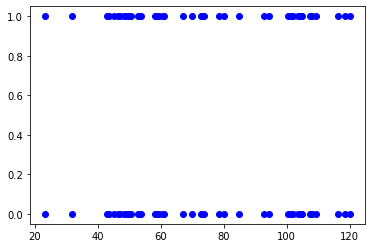

In [ ]:
plt.plot(xtest['Dubai'],lr.predict_proba(xtest[['TS.FSU','TS.Africa','VLCC Single Voyage Fixtures','Dubai','TS.Middle East']].to_numpy()),'bo')

In [ ]:
vlcc['TS.Middle East'].mean()

471.1345318419845

In [ ]:
vlcc['TF.Des_ARA Region'].mean()

2.824

In [ ]:
vlcc['Diff_Brent_Dub'].mean()

2.59587786259542

# SVM

In [ ]:
vin=vlcc[vlcc['Exceptions']==1]
vout=vlcc[vlcc['Exceptions']==0]
vout.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-02-01,0,14.790672,79.01,18.72,39970.65,198,61549482.0,38.340,535,160.53493,8.62632,375.0,0.0,0.0,1,236000.0,7,2125853.0,2,634493.0,228.0,99.00,481.80,16.04903,0.01,71.46,72.64,71.29,-1.35,-0.11,-1.46,72.08,72.76,73.44,72.11,72.39,0.0,0.0,-1.695000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.85,696.20,3.49,359.06,514.52,1392.98,3160.09,1
1,2010-03-01,0,15.475824,82.67,18.72,43224.09,193,60058122.0,37.600,531,159.72758,8.39532,400.0,0.0,0.0,2,525317.0,4,1251664.0,0,0.0,0.0,97.00,465.25,16.69661,0.00,77.59,79.61,74.13,-5.48,3.52,-1.96,77.97,78.49,79.00,74.74,75.29,0.0,0.0,-1.271389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.57,1668.20,1.63,179.54,99.43,1638.24,3724.62,1
2,2010-05-01,0,13.955760,74.55,18.72,35195.68,184,57297704.0,35.803,531,160.03393,8.19099,460.0,0.0,0.0,1,245654.0,4,1234710.0,6,1910205.0,646.0,99.75,481.20,16.48315,0.01,87.44,86.22,85.77,-0.45,1.70,1.25,88.45,89.29,89.97,85.99,86.33,0.0,0.0,-2.913905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.5,1091.23,1369.29,316.63,833.33,213.33,1014.59,4931.92,1
3,2010-07-01,0,10.837008,57.89,18.72,19528.68,185,57700265.0,35.880,533,160.81272,8.13430,380.0,0.0,0.0,0,0.0,5,1530400.0,7,2184946.0,680.0,104.00,443.25,15.88385,0.01,75.01,75.37,73.21,-2.16,1.52,-0.64,75.28,75.70,76.17,73.57,74.07,0.0,0.0,-2.649091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327.53,824.38,244.00,976.48,0.00,967.05,4339.44,1
4,2010-08-01,0,9.642672,51.51,18.72,12233.05,187,58354811.0,36.132,535,161.50403,8.08333,380.0,0.0,0.0,1,285715.0,7,2186403.0,6,1898997.0,620.0,106.00,442.20,16.19335,0.01,78.18,78.99,73.75,-5.24,4.51,-0.73,78.48,79.05,79.66,74.44,75.06,0.0,0.0,-2.198909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,635.60,216.86,63.35,886.46,0.00,467.04,2269.31,1


In [ ]:
vin.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-04-01,1,17.518176,93.58,18.72,53740.25,189,58806458.0,36.978,528,159.02985,8.29135,410.0,0.0,0.0,4,1138678.0,7,2142754.0,2,634000.0,210.0,97.0,472.250,16.42194,0.01,82.70,83.38,78.650,-4.73,3.62,-1.11,83.25,83.70,84.04,79.31,79.66,0.0,0.0,-2.510435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,625.94,1251.97,201.94,940.81,423.61,1622.69,5066.96,1
1,2010-06-01,1,17.501328,93.49,18.72,56926.95,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.310,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16,1
2,2012-03-01,1,16.310140,60.52,26.95,25176.14,123,38825958.0,21.637,589,179.43894,7.51981,457.5,0.0,0.0,2,526551.0,1,318376.0,0,0.0,0.0,97.5,731.875,17.73280,0.00,122.66,106.91,120.010,13.10,3.03,16.13,121.56,120.85,120.24,119.14,118.20,0.0,0.0,-10.649405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.448276,1547.34,1077.82,1.57,430.30,252.10,917.36,4269.96,1
3,2012-04-01,1,17.291120,64.16,26.95,31668.42,122,38507582.0,21.485,588,179.23076,7.54634,460.0,0.0,0.0,1,269065.0,4,1282290.0,0,0.0,0.0,97.0,745.200,18.13957,0.01,122.88,102.93,120.405,17.48,2.40,19.87,122.08,121.36,120.65,119.83,118.80,0.0,0.0,-12.232364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1880.40,1822.11,257.62,518.51,765.84,1435.29,6679.78,1
4,2014-12-01,1,16.599973,68.51,24.23,74172.33,92,28234930.0,14.656,627,192.64842,8.30635,360.0,0.0,0.0,0,0.0,6,1908564.0,0,0.0,0.0,97.0,454.875,18.52333,0.01,70.15,65.99,68.910,2.92,1.11,4.03,70.58,71.14,71.70,69.32,70.03,0.0,0.0,1.010500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.800000,1247.91,720.30,409.87,851.03,486.97,739.33,4557.21,1


In [ ]:
intrain,intest=train_test_split(vin,test_size=0.33)

In [ ]:
outtrain,outtest=train_test_split(vout,test_size=0.33)

In [ ]:
vtrain=shuffle(outtrain.append(intrain))
vtest=shuffle(outtest.append(intest))

In [ ]:
vtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 43 to 6
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 70.0 KB


In [ ]:
vtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 13 to 19
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 35.4 KB


In [ ]:
ytrain=vtrain['Exceptions']
ytest=vtest['Exceptions']

In [ ]:
xtrain=vtrain.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])
xtest=vtest.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])

In [ ]:
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
43,55,17337580.0,9.117,620,190.15819,7.81358,397.5,0.0,0.0,0,0.0,1,320278.0,28,8463869.0,2602.20000,94.0,607.750,17.30851,0.00,110.80,98.70,108.11,9.41,2.79,12.20,110.53,110.27,109.92,107.82,107.66,0.0,0.0,-8.374762,1.0,27500.0,128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.904839,833.92,634.44,160.52,713.84,196.39,353.60,2938.61
6,115,35161449.0,17.012,672,206.68100,9.14571,197.5,0.0,0.0,0,0.0,4,1215646.0,2,638796.0,192.00000,88.0,244.375,20.39000,0.01,49.68,48.40,46.40,-2.00,3.32,1.32,49.71,50.16,50.54,46.31,46.82,0.0,0.0,-3.159773,4.0,38125.0,202,17996.0,5387.0,11880.0,...,NaN,NaN,87.0,16.0,1.0,7.0,NaN,NaN,NaN,37.0,6.0,3.0,2.0,NaN,1.0,NaN,121.0,NaN,3.0,NaN,23.0,NaN,1.0,NaN,2.0,NaN,2.0,7.0,NaN,NaN,NaN,30.0,72.833333,2073.57,1317.42,793.86,1617.41,309.20,671.68,6855.97
22,129,40658859.0,22.979,581,176.93843,7.57372,467.5,0.0,0.0,0,0.0,9,2802944.0,4,1267348.0,384.00000,98.0,725.750,17.32296,0.02,110.98,98.28,109.10,10.82,2.06,12.88,110.69,110.47,110.25,109.48,108.94,0.0,0.0,-8.123947,9.0,19250.0,163,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.967742,942.92,867.81,3.49,638.52,13.71,877.69,3405.10
39,55,17463866.0,9.090,627,192.13020,7.72009,362.5,0.0,0.0,1,301653.0,2,636384.0,6,1870703.0,572.80736,89.5,605.800,18.10796,0.00,114.01,107.76,111.50,3.74,2.95,6.69,112.32,110.99,109.89,110.00,108.74,0.0,0.0,-10.457000,2.0,18000.0,177,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.096774,1394.94,436.04,371.61,441.23,67.28,537.20,3349.38
8,130,39653263.0,20.045,643,197.81973,8.80314,230.0,0.0,0.0,0,0.0,4,1221781.0,6,1859654.0,560.00000,95.5,238.875,19.06000,0.01,48.37,45.36,43.50,-1.86,4.94,3.08,49.05,49.71,50.37,45.45,46.36,0.0,0.0,-0.230000,4.0,48000.0,196,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.383333,1965.31,459.13,1535.04,639.48,398.72,1231.60,6418.67


In [ ]:
vtrain['Exceptions'].value_counts().to_frame()

,Exceptions
0,65
1,22


In [ ]:
#replace numpy
xtrain=xtrain.fillna(-1)
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
43,55,17337580.0,9.117,620,190.15819,7.81358,397.5,0.0,0.0,0,0.0,1,320278.0,28,8463869.0,2602.20000,94.0,607.750,17.30851,0.00,110.80,98.70,108.11,9.41,2.79,12.20,110.53,110.27,109.92,107.82,107.66,0.0,0.0,-8.374762,1.0,27500.0,128,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.904839,833.92,634.44,160.52,713.84,196.39,353.60,2938.61
6,115,35161449.0,17.012,672,206.68100,9.14571,197.5,0.0,0.0,0,0.0,4,1215646.0,2,638796.0,192.00000,88.0,244.375,20.39000,0.01,49.68,48.40,46.40,-2.00,3.32,1.32,49.71,50.16,50.54,46.31,46.82,0.0,0.0,-3.159773,4.0,38125.0,202,17996.0,5387.0,11880.0,...,-1.0,-1.0,87.0,16.0,1.0,7.0,-1.0,-1.0,-1.0,37.0,6.0,3.0,2.0,-1.0,1.0,-1.0,121.0,-1.0,3.0,-1.0,23.0,-1.0,1.0,-1.0,2.0,-1.0,2.0,7.0,-1.0,-1.0,-1.0,30.0,72.833333,2073.57,1317.42,793.86,1617.41,309.20,671.68,6855.97
22,129,40658859.0,22.979,581,176.93843,7.57372,467.5,0.0,0.0,0,0.0,9,2802944.0,4,1267348.0,384.00000,98.0,725.750,17.32296,0.02,110.98,98.28,109.10,10.82,2.06,12.88,110.69,110.47,110.25,109.48,108.94,0.0,0.0,-8.123947,9.0,19250.0,163,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.967742,942.92,867.81,3.49,638.52,13.71,877.69,3405.10
39,55,17463866.0,9.090,627,192.13020,7.72009,362.5,0.0,0.0,1,301653.0,2,636384.0,6,1870703.0,572.80736,89.5,605.800,18.10796,0.00,114.01,107.76,111.50,3.74,2.95,6.69,112.32,110.99,109.89,110.00,108.74,0.0,0.0,-10.457000,2.0,18000.0,177,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.096774,1394.94,436.04,371.61,441.23,67.28,537.20,3349.38
8,130,39653263.0,20.045,643,197.81973,8.80314,230.0,0.0,0.0,0,0.0,4,1221781.0,6,1859654.0,560.00000,95.5,238.875,19.06000,0.01,48.37,45.36,43.50,-1.86,4.94,3.08,49.05,49.71,50.37,45.45,46.36,0.0,0.0,-0.230000,4.0,48000.0,196,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.383333,1965.31,459.13,1535.04,639.48,398.72,1231.60,6418.67


In [ ]:
xtest=xtest.fillna(-1)
xtest.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
13,92,28242469.0,11.860,772,238.12934,9.43836,272.5,0.0,0.0,1,300361.0,6,1856698.0,4,1224300.0,345.0,93.0,386.000,18.56458,0.01,66.55,58.20,64.890,6.69,1.62,8.31,64.74,64.35,64.07,63.63,63.08,49.0,15086033.0,-10.947895,6.0,34500.0,202,19243.0,4115.0,11986.0,...,-1.0,-1.0,249.0,1.0,-1.0,5.0,-1.0,3.0,-1.0,38.0,9.0,7.0,2.0,-1.0,-1.0,-1.0,185.0,-1.0,17.0,1.0,57.0,3.0,1.0,-1.0,-1.0,-1.0,5.0,13.0,-1.0,-1.0,-1.0,69.0,629.307000,3255.310000,1369.950000,1113.260000,2951.300000,315.270000,660.960000,10295.360000
4,96,29671109.0,13.347,723,222.29813,9.37114,295.0,0.0,0.0,0,0.0,4,1209850.0,1,312105.0,81.0,81.0,297.500,19.42000,0.01,47.92,46.33,46.440,0.11,1.46,1.57,48.77,49.04,49.33,46.83,47.01,0.0,0.0,-2.164095,4.0,26700.0,188,19003.0,4805.0,12585.0,...,-1.0,-1.0,310.0,22.0,-1.0,5.0,-1.0,2.0,2.0,93.0,11.0,7.0,2.0,-1.0,-1.0,-1.0,301.0,-1.0,13.0,1.0,52.0,1.0,12.0,-1.0,3.0,-1.0,-1.0,32.0,-1.0,-1.0,-1.0,95.0,508.870000,2775.060000,823.110000,844.660000,2245.320000,467.080000,393.530000,8057.630000
16,162,50943075.0,29.637,566,171.89081,7.71746,505.0,0.0,0.0,0,0.0,4,1216931.0,0,0.0,0.0,102.0,674.500,17.43164,0.01,116.74,95.86,111.050,15.19,5.80,20.99,116.53,116.54,116.53,111.36,111.55,0.0,0.0,-3.297333,4.0,25800.0,168,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.419355,2010.330000,306.290000,127.210000,185.210000,24.190000,628.490000,3359.140000
47,90,27703010.0,14.464,624,191.53460,7.98958,405.0,0.0,0.0,1,299700.0,1,319547.0,2,595277.0,200.0,100.5,596.000,18.28000,0.00,108.07,99.69,104.500,4.81,3.64,8.45,107.53,106.96,106.30,104.55,103.93,0.0,0.0,-10.055000,1.0,25750.0,170,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.600000,1930.230000,1419.090000,575.940000,720.350000,512.710000,1575.760000,6743.690000
3,64,19608648.0,7.926,802,247.40331,9.50436,272.5,0.0,0.0,0,0.0,2,601518.0,9,2736000.0,804.6,92.0,288.625,19.22880,0.00,66.00,61.21,67.255,6.04,-1.22,4.82,65.29,64.68,64.08,65.75,64.87,65.0,20111823.0,-17.343571,2.0,48750.0,269,18521.0,4133.0,12337.0,...,-1.0,-1.0,497.0,3.0,1.0,4.0,-1.0,17.0,5.0,70.0,8.0,7.0,-1.0,2.0,-1.0,-1.0,468.0,-1.0,44.0,-1.0,70.0,1.0,3.0,-1.0,-1.0,2.0,12.0,29.0,-1.0,3.0,2.0,90.0,378.117097,1356.654838,735.101613,502.352226,2677.353226,563.796774,342.277419,6555.653193


In [ ]:
ytrain.head()

43    0
6     0
22    0
39    0
8     1
Name: Exceptions, dtype: int64

In [ ]:
svm=SVC()

In [ ]:
svm.fit(xtrain.to_numpy(),ytrain.to_numpy())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm.support_vectors_

array([[5.50000000e+01, 1.73375800e+07, 9.11700000e+00, ...,
        1.96390000e+02, 3.53600000e+02, 2.93861000e+03],
       [5.50000000e+01, 1.74638660e+07, 9.09000000e+00, ...,
        6.72800000e+01, 5.37200000e+02, 3.34938000e+03],
       [1.74000000e+02, 5.45967150e+07, 3.22810000e+01, ...,
        3.40000000e+02, 1.81754000e+03, 6.70346000e+03],
       ...,
       [9.40000000e+01, 2.92171140e+07, 1.29090000e+01, ...,
        6.89540000e+02, 3.66400000e+02, 6.69570000e+03],
       [7.50000000e+01, 2.29770060e+07, 9.40400000e+00, ...,
        1.02269000e+03, 2.09314000e+03, 1.18399400e+04],
       [6.00000000e+01, 1.84002940e+07, 7.32100000e+00, ...,
        1.65776774e+03, 1.84134387e+03, 1.46621039e+04]])

In [ ]:
svm.score(xtest.to_numpy(),ytest.to_numpy())

0.7045454545454546

In [ ]:
f1_score(ytest.to_numpy(),svm.predict(xtest.to_numpy()))

0.0

In [ ]:
precision_score(ytest.to_numpy(),svm.predict(xtest.to_numpy()))

0.0

In [ ]:
recall_score(ytest.to_numpy(),svm.predict(xtest.to_numpy()))

0.0

In [ ]:
vlcc['TS.Middle East'].mean()

471.1345318419845

In [ ]:
vlcc['TF.Des_ARA Region'].mean()

2.824

In [ ]:
vlcc['Diff_Brent_Dub'].mean()

2.59587786259542

# Random Forest

In [ ]:
vin=vlcc[vlcc['Exceptions']==1]
vout=vlcc[vlcc['Exceptions']==0]
vout.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-02-01,0,14.790672,79.01,18.72,39970.65,198,61549482.0,38.340,535,160.53493,8.62632,375.0,0.0,0.0,1,236000.0,7,2125853.0,2,634493.0,228.0,99.00,481.80,16.04903,0.01,71.46,72.64,71.29,-1.35,-0.11,-1.46,72.08,72.76,73.44,72.11,72.39,0.0,0.0,-1.695000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,193.85,696.20,3.49,359.06,514.52,1392.98,3160.09,1
1,2010-03-01,0,15.475824,82.67,18.72,43224.09,193,60058122.0,37.600,531,159.72758,8.39532,400.0,0.0,0.0,2,525317.0,4,1251664.0,0,0.0,0.0,97.00,465.25,16.69661,0.00,77.59,79.61,74.13,-5.48,3.52,-1.96,77.97,78.49,79.00,74.74,75.29,0.0,0.0,-1.271389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,137.57,1668.20,1.63,179.54,99.43,1638.24,3724.62,1
2,2010-05-01,0,13.955760,74.55,18.72,35195.68,184,57297704.0,35.803,531,160.03393,8.19099,460.0,0.0,0.0,1,245654.0,4,1234710.0,6,1910205.0,646.0,99.75,481.20,16.48315,0.01,87.44,86.22,85.77,-0.45,1.70,1.25,88.45,89.29,89.97,85.99,86.33,0.0,0.0,-2.913905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.5,1091.23,1369.29,316.63,833.33,213.33,1014.59,4931.92,1
3,2010-07-01,0,10.837008,57.89,18.72,19528.68,185,57700265.0,35.880,533,160.81272,8.13430,380.0,0.0,0.0,0,0.0,5,1530400.0,7,2184946.0,680.0,104.00,443.25,15.88385,0.01,75.01,75.37,73.21,-2.16,1.52,-0.64,75.28,75.70,76.17,73.57,74.07,0.0,0.0,-2.649091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1327.53,824.38,244.00,976.48,0.00,967.05,4339.44,1
4,2010-08-01,0,9.642672,51.51,18.72,12233.05,187,58354811.0,36.132,535,161.50403,8.08333,380.0,0.0,0.0,1,285715.0,7,2186403.0,6,1898997.0,620.0,106.00,442.20,16.19335,0.01,78.18,78.99,73.75,-5.24,4.51,-0.73,78.48,79.05,79.66,74.44,75.06,0.0,0.0,-2.198909,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,635.60,216.86,63.35,886.46,0.00,467.04,2269.31,1


In [ ]:
vin.head()

,Date,Exceptions,Dollar_per_MT,BDTI TD3,Flat Rate,Earnings,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,...,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total,Cluster
0,2010-04-01,1,17.518176,93.58,18.72,53740.25,189,58806458.0,36.978,528,159.02985,8.29135,410.0,0.0,0.0,4,1138678.0,7,2142754.0,2,634000.0,210.0,97.0,472.250,16.42194,0.01,82.70,83.38,78.650,-4.73,3.62,-1.11,83.25,83.70,84.04,79.31,79.66,0.0,0.0,-2.510435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,625.94,1251.97,201.94,940.81,423.61,1622.69,5066.96,1
1,2010-06-01,1,17.501328,93.49,18.72,56926.95,186,57973199.0,36.128,532,160.46554,8.13268,390.0,0.0,0.0,1,271208.0,3,909824.0,2,636890.0,205.0,102.0,460.375,16.26297,0.00,74.65,74.09,73.310,-0.78,1.29,0.51,75.40,76.07,76.73,73.86,74.27,0.0,0.0,-2.355000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.096774,1625.90,1282.48,254.13,908.57,0.00,1049.97,5238.16,1
2,2012-03-01,1,16.310140,60.52,26.95,25176.14,123,38825958.0,21.637,589,179.43894,7.51981,457.5,0.0,0.0,2,526551.0,1,318376.0,0,0.0,0.0,97.5,731.875,17.73280,0.00,122.66,106.91,120.010,13.10,3.03,16.13,121.56,120.85,120.24,119.14,118.20,0.0,0.0,-10.649405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.448276,1547.34,1077.82,1.57,430.30,252.10,917.36,4269.96,1
3,2012-04-01,1,17.291120,64.16,26.95,31668.42,122,38507582.0,21.485,588,179.23076,7.54634,460.0,0.0,0.0,1,269065.0,4,1282290.0,0,0.0,0.0,97.0,745.200,18.13957,0.01,122.88,102.93,120.405,17.48,2.40,19.87,122.08,121.36,120.65,119.83,118.80,0.0,0.0,-12.232364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1880.40,1822.11,257.62,518.51,765.84,1435.29,6679.78,1
4,2014-12-01,1,16.599973,68.51,24.23,74172.33,92,28234930.0,14.656,627,192.64842,8.30635,360.0,0.0,0.0,0,0.0,6,1908564.0,0,0.0,0.0,97.0,454.875,18.52333,0.01,70.15,65.99,68.910,2.92,1.11,4.03,70.58,71.14,71.70,69.32,70.03,0.0,0.0,1.010500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.800000,1247.91,720.30,409.87,851.03,486.97,739.33,4557.21,1


In [ ]:
intrain,intest=train_test_split(vin,test_size=0.33)

In [ ]:
outtrain,outtest=train_test_split(vout,test_size=0.33)

In [ ]:
vtrain=shuffle(outtrain.append(intrain))
vtest=shuffle(outtest.append(intest))

In [ ]:
vtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 29 to 1
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 70.0 KB


In [ ]:
vtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 10 to 4
Columns: 102 entries, Date to Cluster
dtypes: datetime64[ns](1), float64(93), int64(8)
memory usage: 35.4 KB


In [ ]:
ytrain=vtrain['Exceptions']
ytest=vtest['Exceptions']

In [ ]:
xtrain=vtrain.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])
xtest=vtest.drop(columns=['Date','Dollar_per_MT','BDTI TD3','Flat Rate','Earnings','Exceptions','Cluster'])

In [ ]:
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
29,85,26892218.0,14.452,609,186.08003,7.60030,395.0,0.0,0.0,1,304706.0,4,1266965.0,4,1258649.0,340.00000,95.0,638.500,18.30957,0.00,108.70,86.01,106.88,20.87,1.52,22.39,107.56,106.73,106.11,106.97,105.82,0.0,0.0,-10.019545,4.0,21750.0,176,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.451613,2179.85,1397.76,620.98,640.44,277.81,1351.59,6574.88
0,89,27603651.0,12.231,734,225.69438,9.37579,307.5,0.0,0.0,1,284999.0,4,1235222.0,9,2848685.0,791.14785,81.0,362.875,19.22000,0.00,63.57,57.42,60.85,3.43,2.72,6.15,62.63,62.34,62.07,60.28,60.00,0.0,0.0,-7.351364,4.0,27750.0,156,18557.0,4724.0,12810.0,...,NaN,NaN,107.0,9.0,NaN,1.0,NaN,NaN,NaN,31.0,3.0,NaN,NaN,NaN,NaN,NaN,101.0,NaN,8.0,NaN,14.0,3.0,4.0,NaN,1.0,NaN,NaN,9.0,NaN,NaN,NaN,31.0,444.366667,1551.89,743.94,871.02,2950.23,561.78,959.62,8082.83
35,73,23110481.0,12.159,621,190.07335,7.67002,410.0,0.0,0.0,1,275914.0,4,1250389.0,0,0.0,0.00000,90.0,617.250,17.96882,0.00,102.37,93.13,101.26,8.13,0.48,8.61,102.04,101.71,101.38,101.66,100.99,0.0,0.0,-7.783977,4.0,18563.0,167,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.333333,2605.85,1230.27,1030.74,537.05,915.83,2135.02,8737.11
26,96,30323576.0,16.557,600,183.14537,7.55458,380.0,0.0,0.0,1,258094.0,5,1549675.0,0,0.0,0.00000,95.0,620.375,17.88950,0.01,104.92,87.96,101.89,13.93,2.73,16.66,103.84,103.29,102.97,101.81,101.52,0.0,0.0,-7.092727,5.0,24000.0,183,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.580645,1978.71,512.88,353.87,417.57,1.73,483.87,3971.21
5,185,57749405.0,35.525,538,162.55769,7.98621,417.5,0.0,0.0,0,0.0,3,913944.0,9,2873049.0,943.50000,107.5,453.500,16.02703,0.01,74.64,71.68,72.80,1.12,1.68,2.80,74.98,75.58,76.20,73.65,74.15,0.0,0.0,-0.694286,3.0,40000.0,156,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,948.81,217.39,250.45,940.01,0.00,614.27,2970.92


In [ ]:
vtrain['Exceptions'].value_counts().to_frame()

,Exceptions
0,65
1,22


In [ ]:
#replace numpy
xtrain=xtrain.fillna(-1)
xtrain.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
29,85,26892218.0,14.452,609,186.08003,7.60030,395.0,0.0,0.0,1,304706.0,4,1266965.0,4,1258649.0,340.00000,95.0,638.500,18.30957,0.00,108.70,86.01,106.88,20.87,1.52,22.39,107.56,106.73,106.11,106.97,105.82,0.0,0.0,-10.019545,4.0,21750.0,176,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106.451613,2179.85,1397.76,620.98,640.44,277.81,1351.59,6574.88
0,89,27603651.0,12.231,734,225.69438,9.37579,307.5,0.0,0.0,1,284999.0,4,1235222.0,9,2848685.0,791.14785,81.0,362.875,19.22000,0.00,63.57,57.42,60.85,3.43,2.72,6.15,62.63,62.34,62.07,60.28,60.00,0.0,0.0,-7.351364,4.0,27750.0,156,18557.0,4724.0,12810.0,...,-1.0,-1.0,107.0,9.0,-1.0,1.0,-1.0,-1.0,-1.0,31.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,101.0,-1.0,8.0,-1.0,14.0,3.0,4.0,-1.0,1.0,-1.0,-1.0,9.0,-1.0,-1.0,-1.0,31.0,444.366667,1551.89,743.94,871.02,2950.23,561.78,959.62,8082.83
35,73,23110481.0,12.159,621,190.07335,7.67002,410.0,0.0,0.0,1,275914.0,4,1250389.0,0,0.0,0.00000,90.0,617.250,17.96882,0.00,102.37,93.13,101.26,8.13,0.48,8.61,102.04,101.71,101.38,101.66,100.99,0.0,0.0,-7.783977,4.0,18563.0,167,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,282.333333,2605.85,1230.27,1030.74,537.05,915.83,2135.02,8737.11
26,96,30323576.0,16.557,600,183.14537,7.55458,380.0,0.0,0.0,1,258094.0,5,1549675.0,0,0.0,0.00000,95.0,620.375,17.88950,0.01,104.92,87.96,101.89,13.93,2.73,16.66,103.84,103.29,102.97,101.81,101.52,0.0,0.0,-7.092727,5.0,24000.0,183,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,222.580645,1978.71,512.88,353.87,417.57,1.73,483.87,3971.21
5,185,57749405.0,35.525,538,162.55769,7.98621,417.5,0.0,0.0,0,0.0,3,913944.0,9,2873049.0,943.50000,107.5,453.500,16.02703,0.01,74.64,71.68,72.80,1.12,1.68,2.80,74.98,75.58,76.20,73.65,74.15,0.0,0.0,-0.694286,3.0,40000.0,156,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,948.81,217.39,250.45,940.01,0.00,614.27,2970.92


In [ ]:
xtest=xtest.fillna(-1)
xtest.head()

,UL/VLCC Orderbook...3,UL/VLCC Orderbook...4,VLCC Orderbook % Fleet,VLCC Fleet Development...6,VLCC Fleet Development...7,VLCC Fleet - Average Age,VLCC Average Demolition Prices,VLCC Losses...10,VLCC Losses...11,VLCC Demolition...12,VLCC Demolition...13,VLCC Deliveries...14,VLCC Deliveries...15,UL/VLCC Contracting...16,UL/VLCC Contracting...17,UL/VLCC Contracting...18,VLCC Newbuilding Prices,Fujairah Bunker Prices,AG Crude Exports,Net Additions,Brent,WTI,Dubai,Diff_Dub_WTI,Diff_Brent_Dub,Diff_Brent_WTI,LCOc2.Brent_2,LCOc3.Brent_3,LCOc4.Brent_4,PCAAU00.Dubai_02,PCAAV00.Dubai_03,UL/VLCC Tankers Storage (No.),UL/VLCC Tankers Storage (DWT),Contango_M7-M1,New Addition_Forward,Time Charter 1 year ($/day),VLCC Single Voyage Fixtures,TP.U.S. + Canada,TP.Latin America,TP.Total Europe,...,F.Des_ECI,F.Des_ECSA,F.Des_FE,F.Des_LA,F.Des_MED,F.Des_MED/ BS,F.Des_MED/BS,F.Des_RS,F.Des_SAF,F.Des_SEA,F.Des_UKC,F.Des_USAC,F.Des_USEC,F.Des_USWC,F.Des_WAF,F.Des_WCSA,F.Origin_AG/ WCI,F.Origin_EAF,F.Origin_ECSA,F.Origin_FE,F.Origin_LA,F.Origin_MED,F.Origin_MED/ BS,F.Origin_MED/BS,F.Origin_RS,F.Origin_SAF,F.Origin_SEA,F.Origin_UKC,F.Origin_USAC,F.Origin_USEC,F.Origin_USWC,F.Origin_WAF,TS.Africa,TS.Asia Pacific,TS.Europe,TS.FSU,TS.Latin America,TS.Middle East,TS.North America,TS.Total
10,97,29744444.0,13.876,697,214.35290,9.25311,267.5,0.0,0.0,0,0.0,1,310595.0,0,0.0,0.0,84.5,322.800,21.39000,0.00,56.82,53.89,53.85,-0.04,2.90,2.86,57.49,58.04,58.44,54.25,54.68,0.0,0.0,-2.159286,1.0,31250.0,172,18155.0,4934.0,12957.0,...,-1.0,4.0,315.0,27.0,8.0,28.0,-1.0,10.0,7.0,86.0,85.0,20.0,4.0,-1.0,1.0,1.0,369.0,-1.0,23.0,-1.0,62.0,8.0,35.0,1.0,5.0,-1.0,2.0,36.0,-1.0,1.0,2.0,132.0,244.840000,972.29,279.00,742.71,2094.11,856.00,430.70,5619.63
1,116,35462988.0,17.032,677,208.21626,9.24409,222.5,0.0,0.0,0,0.0,6,1807789.0,7,2196768.0,605.4,86.0,242.875,20.71900,0.01,47.04,44.86,44.81,-0.05,2.23,2.18,46.89,47.27,47.68,45.10,45.38,0.0,0.0,-2.406023,6.0,30438.0,171,18327.0,5162.0,12841.0,...,-1.0,2.0,122.0,20.0,-1.0,14.0,-1.0,1.0,7.0,43.0,22.0,9.0,-1.0,-1.0,6.0,2.0,140.0,-1.0,9.0,-1.0,43.0,2.0,15.0,-1.0,3.0,-1.0,1.0,6.0,1.0,-1.0,1.0,60.0,128.709677,1858.17,588.77,1185.72,2030.08,585.35,314.63,6691.44
51,90,27626378.0,14.364,626,192.32516,8.11009,392.5,0.0,0.0,0,0.0,2,629280.0,0,0.0,0.0,98.0,602.500,18.21000,0.00,103.19,95.84,100.29,4.45,2.75,7.20,103.77,104.17,104.46,101.14,101.60,0.0,0.0,-4.127810,2.0,28800.0,157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.838710,1151.10,503.23,552.00,545.32,189.06,511.55,3642.11
49,87,26710914.0,13.915,625,191.95297,8.02547,395.0,0.0,0.0,1,281598.0,3,960215.0,2,599979.0,200.0,100.0,608.625,18.36000,0.00,112.36,105.51,109.21,3.70,3.19,6.89,112.07,111.68,111.26,108.58,108.18,0.0,0.0,-10.112857,3.0,23500.0,149,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.000000,2313.40,1321.45,532.53,597.65,339.18,1342.64,6472.86
12,96,29510882.0,12.508,765,235.93693,9.44139,272.5,0.0,0.0,0,0.0,7,2192413.0,3,924000.0,271.3,93.0,420.500,18.93786,0.01,64.49,53.36,63.81,10.45,0.66,11.11,61.99,61.16,60.67,63.36,62.12,40.0,12259887.0,-13.103929,7.0,31625.0,319,18418.0,4064.0,11966.0,...,-1.0,-1.0,300.0,11.0,-1.0,2.0,-1.0,2.0,2.0,73.0,7.0,17.0,2.0,-1.0,-1.0,-1.0,248.0,-1.0,26.0,1.0,71.0,1.0,4.0,-1.0,3.0,-1.0,-1.0,20.0,-1.0,-1.0,-1.0,70.0,362.321290,3076.17,1388.13,1565.60,2885.27,407.27,1249.84,10934.60


In [ ]:
ytrain.head()

29    0
0     1
35    0
26    0
5     0
Name: Exceptions, dtype: int64

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(xtrain.to_numpy(),ytrain.to_numpy())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(xtest.to_numpy(),ytest.to_numpy())

0.7272727272727273

In [ ]:
f1_score(ytest.to_numpy(),rf.predict(xtest.to_numpy()))

0.33333333333333326

In [ ]:
precision_score(ytest.to_numpy(),rf.predict(xtest.to_numpy()))

0.42857142857142855

In [ ]:
recall_score(ytest.to_numpy(),rf.predict(xtest.to_numpy()))

0.2727272727272727

In [ ]:
vlcc['TS.Middle East'].mean()

471.1345318419845

In [ ]:
vlcc['TF.Des_ARA Region'].mean()

2.824

In [ ]:
vlcc['Diff_Brent_Dub'].mean()

2.59587786259542